In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from kmodes.kmodes import KModes
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import sklearn
from sklearn import svm
from sklearn.preprocessing import PowerTransformer
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import keras
from keras.layers import Embedding
from random import randrange

In [2]:
df2 = pd.read_csv("ks-projects-201801.csv", sep=",", header=None, engine='python') 

In [3]:
header = df2.iloc[0]
# take the rest of your data minus the header row
df2 = df2[1:]
# set the header row as the df header
df2.columns = header
# pd.set_option('display.max_rows', 7500)
# pd.set_option('display.max_columns', 106)
#df2.head(5)

In [4]:
df2.isnull().sum()

0
ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [5]:
df2 = df2.dropna(axis=0)
#df2.head(5)

In [6]:
# Cleaning Check
df2.isnull().sum()

0
ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [7]:
# Linear Regression

In [8]:
df4 = df2
df4.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
1,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000,8/11/2015 12:12,0,failed,0,GB,0,0,1533.95
2,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000,9/2/2017 4:43,2421,failed,15,US,100,2421,30000
3,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000,1/12/2013 0:20,220,failed,3,US,220,220,45000
4,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000,3/17/2012 3:24,1,failed,1,US,1,1,5000
5,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500,7/4/2015 8:35,1283,canceled,14,US,1283,1283,19500


In [9]:
df4['main_category'].value_counts()

Film & Video    62696
Music           49530
Publishing      39379
Games           35225
Technology      32562
Design          30066
Art             28152
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

In [10]:
le = preprocessing.LabelEncoder()
#df4['backers'] = le.fit_transform(df4.backers.values)
#df4['goal'] = le.fit_transform(df4.goal.values)
#df4['pledged'] = le.fit_transform(df4.pledged.values)
#df4['usd_pledged'] = le.fit_transform(df4.usd_pledged.values)
#df4['usd_pledged_real'] = le.fit_transform(df4.usd_pledged_real.values)
#df4['usd_goal_real'] = le.fit_transform(df4.usd_goal_real.values)
df4['state'] = le.fit_transform(df4.state.values) 
df4['country'] = le.fit_transform(df4.country.values) 
df4['category'] = le.fit_transform(df4.category.values) 
df4['main_category'] = le.fit_transform(df4.main_category.values) 
df4['currency'] = le.fit_transform(df4.currency.values)
#df4['ID'] = le.fit_transform(df4.ID.values)

In [11]:
df4['main_category'].value_counts()

6     62696
10    49530
12    39379
8     35225
13    32562
4     30066
0     28152
7     24599
5     22812
14    10912
1     10819
11    10778
2      8809
9      4754
3      3767
Name: main_category, dtype: int64

In [12]:
df4.dtypes

0
ID                  object
name                object
category             int32
main_category        int32
currency             int32
deadline            object
goal                object
launched            object
pledged             object
state                int32
backers             object
country              int32
usd_pledged         object
usd_pledged_real    object
usd_goal_real       object
dtype: object

In [13]:
X = df4.drop(columns = ['name', 'main_category', 'deadline', 'launched'], axis = 1)
lm=LinearRegression()
lm

LinearRegression()

In [14]:
lm.fit(X,df4.state)

LinearRegression()

In [15]:
lm.predict(X)

array([1., 1., 1., ..., 1., 1., 1.])

In [16]:
print('Estimated intercept coefficient:',lm.intercept_)

Estimated intercept coefficient: 2.027933376780311e-12


In [17]:
print("Number of coeffiients:", len(lm.coef_))

Number of coeffiients: 11


In [18]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,ID,-1.301807e-23
1,category,-1.004743e-14
2,currency,6.547139e-14
3,goal,-2.392339e-19
4,pledged,8.821986e-17
5,state,1.000000e+00
6,backers,9.025361e-16
7,country,-2.790589e-14
8,usd_pledged,1.543317e-18
9,usd_pledged_real,-2.654241e-16


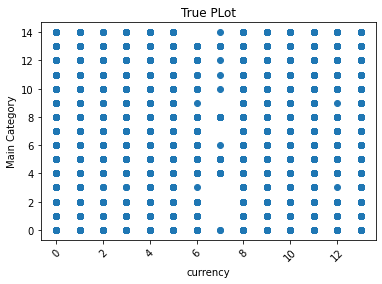

In [19]:
# True PLot
plt.scatter(df4.currency, df4.main_category)
plt.xlabel('currency')
plt.ylabel('Main Category')
plt.title('True PLot')
plt.xticks(rotation=45)
plt.show()

In [20]:
lm.predict(X)[0:5]

array([1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.5161089e-12])

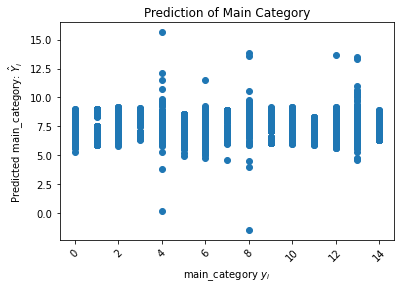

In [30]:
# Prediction PLot
plt.scatter(df4.main_category, lm.predict(X))
plt.xlabel('main_category $y_i$')
plt.ylabel('Predicted main_category: $\hat{Y}_i$')
plt.title('Prediction of Main Category')
plt.xticks(rotation=45)
plt.show()

In [31]:
mseFull = np.mean((df4.main_category - lm.predict(X)) ** 2)
print(mseFull)

14.713764754782597


In [23]:
v = np.var(X)
print("variance", v)

variance 0
category    2051.544046
currency      15.525936
state          1.182740
country       34.935685
dtype: float64


In [24]:
lm = LinearRegression()
lm.fit(X[['usd_pledged']], df4.main_category)

LinearRegression()

In [25]:
mse2 = np.mean((df4.main_category - lm.predict(X[['usd_pledged']])) ** 2)
mse2

15.327959174130427

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, df4.main_category, test_size=.40, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(224916, 11)
(149944, 11)
(224916,)
(149944,)


In [27]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

In [28]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean,(Y_train-lm.predict(X_train)) ** 2)
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean(Y_test-lm.predict(X_test)) ** 2)
# print("Fit a model X_train, and calculate MSE with Y_train:"), np.mean((Y_train-lm.predict(X_train)) ** 2)
# print("Fit a model X_train, and calculate MSE with X_test, Y_test:"), np.mean((Y_test-lm.predict(X_test)) ** 2)

Fit a model X_train, and calculate MSE with Y_train: <function mean at 0x0000024A4676EDC0> 230179    31.667067
73672     37.105144
193270    31.955780
370945     4.727639
364675     0.656887
            ...    
234778     0.687147
125854    17.606401
20684     18.849822
18843     47.439290
300832    24.173767
Name: main_category, Length: 224916, dtype: float64
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.0001918306092718783


Text(0, 0.5, 'Residuals')

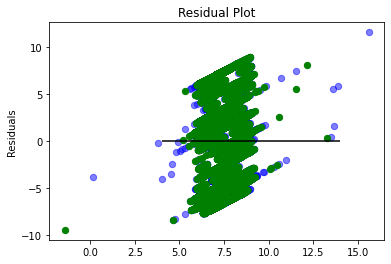

In [29]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - Y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - Y_test, c='g', s=40)
plt.hlines(y=0, xmin=4, xmax=14, color="black")
plt.title('Residual Plot')
plt.ylabel('Residuals')